## WeRateDogs of Twitter
Objective:  Wrangle the WeRateDogs Twitter account data to create interesting analyses and visualization

### Gather Data

In [1]:
# importing necessary libraries
import pandas as pd
import requests 
import os
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
from timeit import default_timer as timer

- Manually download the WeRateDogs Twitter archive which was given to students 
- Progammatically download the tweet image predictions (i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network
- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [2]:
#download account data
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Get URL which contains image predictions tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#save the image predictions file 
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

df_image_predict = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)


2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# Change this to True to re-query the Twitter API
query_api = False
# only run query code if 'query' is True
if query_api:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
# Save the retweet and favorite counts for each tweet ID in a new pandas DataFrame
tweets_df = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweets_df = tweets_df.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweets_df = tweets_df.reset_index(drop=True)
tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7320,34869
1,892177421306343426,5468,30210
2,891815181378084864,3612,22737
3,891689557279858688,7508,38126
4,891327558926688256,8070,36384
...,...,...,...
2326,666049248165822465,38,92
2327,666044226329800704,121,257
2328,666033412701032449,39,106
2329,666029285002620928,41,117


## Assess

In [7]:
#display the twitter_archive table
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# visual assessment - look in a spreadsheet program
df_twitter_archive.to_csv('account_data.csv')

The four main data quality dimensions are:

* __Completeness__: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

* __Validity__: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).

* __Accuracy__: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.

* __Consistency__: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

#### Quality Issues 
* tweet_id column is in int64 format.  Should be string
* replace names that start with lower case letters in Name column to Nan
* Validity issue: Replace "None" in the name column with Nan
* timestamp and retweeted_status_timestamp columns should be in datetime format not object
* retweeted_status_id, retweeted_status_user_id, in_reply_to_status and in_reply_to_user_id columns should be in string format not float64
* rating_numerator and rating_denominator columns should be float64 not int64
* rating_denominator is 0 for row 313
* retweeted data should be dropped from the table
* duplicate URL's in the expanded Url column



The five most common tidiness issues are:

* Column headers are values, not variable names.
* Multiple variables are stored in one column.
* Variables are stored in both rows and columns.
* Multiple types of observational units are stored in the same table.
* A single observational unit is stored in multiple tables.

#### Tidiness Issues
* dog Stage columns which are split up into 4 columns ( 4 diferent dog stages) can be merged into one column
* Tweet data can be found in different tables.  clean and merge all 3 tables

In [9]:
# programmatic assessment account data
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# programmatic assessment 
df_twitter_archive.describe()[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
# programmatic assessment 
df_twitter_archive.tweet_id.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: tweet_id, Length: 2356, dtype: bool

In [12]:
# programmatic assessment 
df_twitter_archive.tweet_id.nunique()

2356

In [13]:
# programmatic assessment 
df_twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [14]:
# programmatic assessment 
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# programmatic assessment 
df_twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [16]:
# programmatic assessment 
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
# programmatic assessment account data
df_twitter_archive[df_twitter_archive.retweeted_status_id.notnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [18]:
# visual assessment image predictions
# already present as file - opened in spreadsheet program

#### Quality Issues - _image predictions_
* tweet-id column should be in string format
* first letter in p1,p2,p3 dog breed columns should be capital
* p1_conf,p2_conf, and p3_conf column len should be rounded to 2 decimal points


#### Tidyness Issues- _image predictions_
* Tweet data can be found on different tables

In [19]:
# programmatic assessment image prediction
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# programmatic assessment image prediction
df_image_predict.p1_conf.sort_values(ascending=False).round(2)

106     1.00
1299    1.00
1229    1.00
149     1.00
1372    1.00
        ... 
246     0.07
1370    0.06
1093    0.06
136     0.06
38      0.04
Name: p1_conf, Length: 2075, dtype: float64

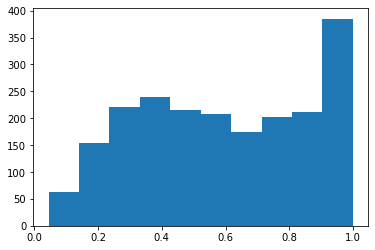

In [21]:
plt.hist(df_image_predict.p1_conf);

In [22]:
# programmatic assessment image prediction
df_image_predict.p2_conf.sort_values(ascending=False).round(2)

986     0.49
1756    0.47
1514    0.46
232     0.46
72      0.45
        ... 
1372    0.00
230     0.00
1229    0.00
1299    0.00
106     0.00
Name: p2_conf, Length: 2075, dtype: float64

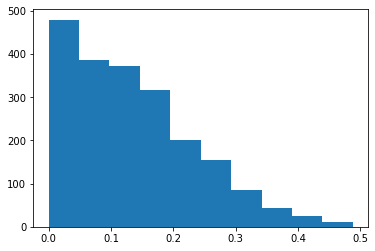

In [23]:
plt.hist(df_image_predict.p2_conf);

In [24]:
# programmatic assessment image prediction
df_image_predict.p3_conf.sort_values(ascending=False).round(2)

1071    0.27
1080    0.27
97      0.27
123     0.26
1613    0.25
        ... 
1299    0.00
1760    0.00
1906    0.00
149     0.00
106     0.00
Name: p3_conf, Length: 2075, dtype: float64

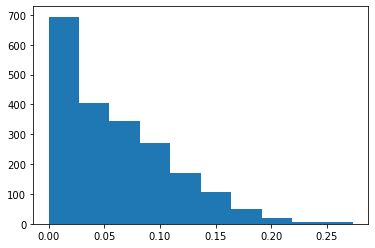

In [25]:
plt.hist(df_image_predict.p3_conf);

In [26]:
# programmatic assessment image prediction
df_image_predict.p1[df_image_predict.p1_dog == True].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
standard_schnauzer      1
EntleBucher             1
silky_terrier           1
groenendael             1
Scotch_terrier          1
Name: p1, Length: 111, dtype: int64

In [27]:
# programmatic assessment image prediction
df_image_predict.p2[df_image_predict.p2_dog == True].value_counts()

Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
standard_schnauzer        1
Japanese_spaniel          1
Bernese_mountain_dog      1
EntleBucher               1
affenpinscher             1
Name: p2, Length: 113, dtype: int64

#### Quality Issues - _tweets_df_
* 

#### Tidyness Issues- _tweets_df_
* Tweet data can be found on different tables

In [28]:
# visual assessment - look in a spreadsheet program
tweets_df.to_csv('tweet_data.csv') 

In [29]:
# programmatic assessment tweets_df
tweets_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


In [30]:
# programmatic assessment tweets_df
tweets_df.describe()[['favorite_count', 'retweet_count']]

,favorite_count,retweet_count
count,2331,2331
unique,1970,1672
top,0,212
freq,163,6


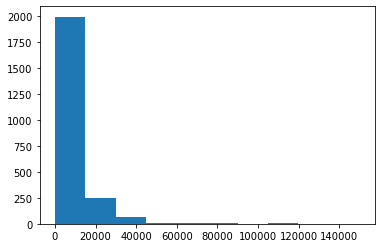

In [31]:
# programmatic assessment tweets_df
plt.hist(tweets_df.favorite_count);

In [32]:
# programmatic assessment tweets_df
tweets_df.favorite_count.sort_values()

459          0
439          0
437          0
434          0
431          0
         ...  
1055    110827
129     112305
517     115732
397     128156
1015    149785
Name: favorite_count, Length: 2331, dtype: object

In [33]:
# programmatic assessment tweets_df
tweets_df.favorite_count.value_counts()

0        163
3128       3
1448       3
680        3
2532       3
        ... 
2545       1
1205       1
5296       1
23030      1
1912       1
Name: favorite_count, Length: 1970, dtype: int64

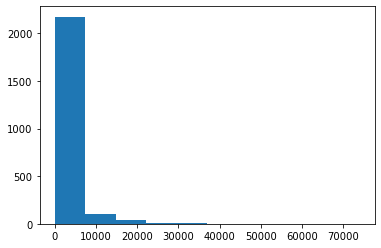

In [34]:
# programmatic assessment tweets_df
plt.hist(tweets_df.retweet_count);

In [35]:
# programmatic assessment tweets_df
tweets_df.retweet_count.sort_values()

279         1
328         2
1271        2
262         2
109         3
        ...  
65      38854
397     41666
517     53893
1055    55087
1015    73912
Name: retweet_count, Length: 2331, dtype: object

In [36]:
# programmatic assessment tweets_df
tweets_df.retweet_count.value_counts()

212     6
433     5
579     5
693     5
491     5
       ..
1253    1
1254    1
1255    1
4789    1
8192    1
Name: retweet_count, Length: 1672, dtype: int64

## Clean
1. Address quality completeness issues (missing data) first
2. Address tidyness issues second
3. Address the 3 remaining quality issues (validity,accuracy,consistency)

#### Create Copies

In [37]:
df_twitter_archive_clean = df_twitter_archive.copy()
tweets_df_clean = tweets_df.copy()
df_image_predict_clean = df_image_predict.copy()

### Tidyness Issue

#### 1. The variable dog stage can be found in different columns

#### Define
Combine 4 dog stages into a new column called dog_stage.

In [38]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
df_twitter_archive_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
df_twitter_archive_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [41]:
df_twitter_archive_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [42]:
df_twitter_archive_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Code

In [43]:
# handle none
df_twitter_archive_clean.doggo.replace('None', '', inplace=True)
df_twitter_archive_clean.floofer.replace('None', '', inplace=True)
df_twitter_archive_clean.pupper.replace('None', '', inplace=True)
df_twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [44]:
# merge into column
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean.doggo + df_twitter_archive_clean.floofer + df_twitter_archive_clean.pupper + df_twitter_archive_clean.puppo


In [45]:
df_twitter_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [46]:
# separate multiple dog stages with commas
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [47]:
# handle missing values
df_twitter_archive_clean.loc[df_twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [48]:
df_twitter_archive_clean.dog_stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [49]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN


In [50]:
#drop unnecessary columns 
df_twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [51]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Quality Issue 

#### 1. Tweet-id column:  Consistency in datatype of the tweet-id columns in the tables

#### Define

Convert the tweet-id column's data type from int64 to a string using astype in the 3 tables

#### Code

In [52]:
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)

In [53]:
df_image_predict_clean.tweet_id = df_image_predict_clean.tweet_id.astype(str)

In [54]:
tweets_df_clean.tweet_id = df_image_predict_clean.tweet_id.astype(str)

#### Test

In [55]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

In [56]:
tweets_df_clean

,tweet_id,retweet_count,favorite_count
0,666020888022790149,7320,34869
1,666029285002620928,5468,30210
2,666033412701032449,3612,22737
3,666044226329800704,7508,38126
4,666049248165822465,8070,36384
...,...,...,...
2326,NaN,38,92
2327,NaN,121,257
2328,NaN,39,106
2329,NaN,41,117


### Tidyness Issue

#### 2. Tweet data can be found on different tables

#### Define
Merge the clean Twitter Archive table with the Tweets table

#### Code

In [57]:
df_twitter_data_clean = pd.merge(left=df_twitter_archive_clean, right=tweets_df_clean, left_on='tweet_id', right_on='tweet_id' , how= 'inner')

#### Test

In [58]:
df_twitter_data_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,439,1101
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,326,769
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,466,887
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,95,403
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,387,1003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,8070,36384
2071,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,7508,38126
2072,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,3612,22737
2073,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,5468,30210


In [59]:
df_twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   321 n

### Quality Issue

#### 2. Consistency issue with some dog breed names in the image predict df p1_dog, p2_dog, p3_dog columns starting with lower case letters and some breed names contain underscores (_)

#### Define

Capitalize all the first letters in the p1_dog, p2_dog, p3_dog columns in df_image_predict_clean and replace ('_',' ')

#### Code

In [60]:
df_image_predict_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [61]:
df_image_predict_clean.p1 = df_image_predict_clean.p1.str.title()
df_image_predict_clean.p2 = df_image_predict_clean.p2.str.title()
df_image_predict_clean.p3 = df_image_predict_clean.p3.str.title()

In [62]:
df_image_predict_clean.p1 = df_image_predict_clean.p1.str.replace('_', ' ')
df_image_predict_clean.p2 = df_image_predict_clean.p2.str.replace('_', ' ')
df_image_predict_clean.p3 = df_image_predict_clean.p3.str.replace('_', ' ')

#### Test

In [63]:
df_image_predict_clean.p3

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
                   ...             
2070    German Short-Haired Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2075, dtype: object

#### Tidyness Issues

#### 3. Image predictions df has not been properly cleaned

#### Define

#### Create breed and confidence columns using else if statement and append to df.  Delete unnecessary columns. 

#### Code

In [64]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)

           
df_image_predict_clean.apply(breed_confidence, axis=1)
df_image_predict_clean['breed'] = breed
df_image_predict_clean['confidence'] = confidence

In [65]:
df_image_predict_clean.drop(['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [66]:
df_image_predict_clean.head()

,tweet_id,breed,confidence
0,666020888022790149,Welsh Springer Spaniel,0.465074
1,666029285002620928,Redbone,0.506826
2,666033412701032449,German Shepherd,0.596461
3,666044226329800704,Rhodesian Ridgeback,0.408143
4,666049248165822465,Miniature Pinscher,0.560311


### Tidyness Issue

#### 4.  Tweet data can be found on different tables

#### Define

Merge the twitter_data_clean table with the clean image_predict_clean teable

In [67]:
twitter_archive_master = pd.merge(left=df_twitter_data_clean, right=df_image_predict_clean, left_on='tweet_id', right_on='tweet_id' , how= 'inner')

#### Test

In [68]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,439,1101,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,326,769,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,466,887,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,95,403,Labrador Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,387,1003,Basset,0.555712


In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  dog_stage                   321 n

#### Quality Issue

#### 3.  Retweet data is found in the twitter_archive_master df

Drop the non-original tweets from the table

#### Code

In [70]:
#drop rows that contain retweet data by filtering out all non-Null data rows.  Reduced number of rows in table by 181.
twitter_archive_master=twitter_archive_master[twitter_archive_master.retweeted_status_id.isnull() == True]

In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  dog_stage                   306 n

In [72]:
# drop unnecessary columns
twitter_archive_master.drop(labels = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [73]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,439,1101,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,326,769,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,466,887,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,95,403,Labrador Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,387,1003,Basset,0.555712


In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  dog_stage              306 non-null    object 
 11  retweet_count          1994 non-null   object 
 12  favorite_count         1994 non-null   object 
 13  breed                  1994 non-null   object 
 14  confidence             1994 non-null   float64
dtypes: f

#### 4.  Consistency issue with datatype for timestamp which is object but should be date time

#### Define

Convert timestamp column from object to datetime datatype

#### Code

Consistency issue with datatype for timestamp which is object but should be date time

In [75]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

#### Test

In [76]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              306 non-null    object             
 11  retweet_count          1994 non-null   object           

#### 5. Consistency issue with some names in the df_master_clean name column starting with lower case letters

#### Define

#### Code

In [77]:
mask1 = twitter_archive_master.name.str.islower()
column_name = 'name'
twitter_archive_master.loc[mask1, column_name] = np.nan

#### Test

In [78]:
twitter_archive_master.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

In [79]:
twitter_archive_master.name.value_counts()  

None       546
Charlie     11
Cooper      10
Oliver      10
Lucy        10
          ... 
Crumpet      1
Ozzie        1
Hanz         1
Rolf         1
Bloo         1
Name: name, Length: 914, dtype: int64

In [80]:
sum(twitter_archive_master.name.isna())

98

#### 6.  Validity issue with "None" in the name column

##### Define

Replace "None" in the name column with Nan

##### Code

In [81]:
twitter_archive_master.name.replace('None', np.nan, inplace=True)

##### Test

In [82]:
sum(twitter_archive_master.name.isna())

644

#### 7. Rating numerator column has not been properly cleaned

#### Define

Extract correct rating numerators from text column using regex.  Convert both columns to float.  Replace original columns

#### Code

In [83]:
# visual assessment - look in a spreadsheet program
twitter_archive_master.to_csv('df_master_clean.csv')

In [84]:
#display text which shows discrepnancy in the data found after visual assessment.  row 41 numerator is currently 5 should be 13.5 as per below
twitter_archive_master.iloc[39].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [85]:
#extract
rating = twitter_archive_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [86]:
rating

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2070,5,10
2071,6,10
2072,9,10
2073,7,10


In [87]:
#rename columns
rating.columns = ['rating_numerator', 'rating_denominator']

In [88]:
# convert both columns to float datatype
rating ['rating_numerator']= rating ['rating_numerator'].astype(float)
rating ['rating_denominator'] = rating ['rating_denominator'].astype(float) 

In [89]:
rating.iloc[39]# confirm proper extraction row 41 in table

rating_numerator      13.5
rating_denominator    10.0
Name: 41, dtype: float64

In [90]:
#compare 
mask=twitter_archive_master['rating_numerator'] != rating['rating_numerator']
twitter_archive_master.loc[mask,'rating_numerator']

41       5
559     75
615     27
1453    26
Name: rating_numerator, dtype: int64

In [91]:
rating.loc[mask,'rating_numerator']

41      13.50
559      9.75
615     11.27
1453    11.26
Name: rating_numerator, dtype: float64

In [92]:
twitter_archive_master['rating_numerator'] = rating['rating_numerator'] #replace the original column

#### Test

In [93]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,439,1101,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,326,769,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,466,887,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,95,403,Labrador Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,387,1003,Basset,0.555712


#### 8.  Expanded URL column data in the twitter archive table doesnt always match the tweet Text column

#### Define

Extract the correct URL's from the Text column and replace the orginal URL column

#### Code

In [94]:
twitter_archive_master.text.head

<bound method NDFrame.head of 0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2070    Here we have a 1949 1st generation vulpix. Enj...
2071    This is a purebred Piers Morgan. Loves to Netf...
2072    Here is a very happy pup. Big fan of well-main...
2073    This is a western brown Mitsubishi terrier. Up...
2074    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 1994, dtype: object>

In [95]:
#extract
image_urls=twitter_archive_master.text.str.extract('([https]+://[\w(\.|/)]+)', expand=True)  

In [96]:
image_urls

,0
0,https://t.co/MgUWQ76dJU
1,https://t.co/0Xxu71qeIV
2,https://t.co/wUnZnhtVJB
3,https://t.co/tD36da7qLQ
4,https://t.co/AtUZn91f7f
...,...
2070,https://t.co/4B7cOc1EDq
2071,https://t.co/DWnyCjf2mx
2072,https://t.co/y671yMhoiR
2073,https://t.co/r7mOb2m0UI


In [97]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,439,1101,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,326,769,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,466,887,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,95,403,Labrador Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,387,1003,Basset,0.555712


In [98]:
twitter_archive_master['expanded_urls']=image_urls #replace the original column

#### Test

In [99]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,13.0,10,Phineas,NaN,439,1101,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,13.0,10,Tilly,NaN,326,769,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,12.0,10,Archie,NaN,466,887,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,13.0,10,Darla,NaN,95,403,Labrador Retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,12.0,10,Franklin,NaN,387,1003,Basset,0.555712


In [100]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float64            
 8   rating_denominator     1994 non-null   int64              
 9   name                   1350 non-null   object             
 10  dog_stage              306 non-null    object             
 11  retweet_count          1994 non-null   object           

### Save Clean data as twitter_archive_master.csv

In [101]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### Analyze

In [102]:
df1 = pd.read_csv('twitter_archive_master.csv')

In [103]:
df_analyze = df1.copy()

In [104]:
df1.head()['breed']

0        Unidentifiable
1             Chihuahua
2             Chihuahua
3    Labrador Retriever
4                Basset
Name: breed, dtype: object

In [105]:
df_analyze.head()['breed']

0        Unidentifiable
1             Chihuahua
2             Chihuahua
3    Labrador Retriever
4                Basset
Name: breed, dtype: object

### Which breed gets the most favorites?

In [106]:
# breeds with favorite counts
fav_breed = df_analyze.groupby(['breed']).sum()['favorite_count'].sort_values(ascending = False).head(10)
fav_breed

breed
Unidentifiable        3022798.0
Golden Retriever      1013785.0
Chihuahua              991058.0
Labrador Retriever     830314.0
Pembroke               635768.0
Pug                    513241.0
Toy Poodle             447174.0
Chow                   391992.0
Cocker Spaniel         343440.0
Pomeranian             316197.0
Name: favorite_count, dtype: float64

### Which breed received the highest rating

In [107]:
rating = df_analyze.rating_numerator / df_analyze.rating_denominator
df_analyze['rating'] = rating
rating.sort_values().tail(20)

786       1.400000
206       1.400000
95        1.400000
634       1.400000
165       1.400000
362       1.400000
324       1.400000
64        1.400000
49        1.400000
571       1.400000
153       1.400000
113       1.400000
333       1.400000
36        1.400000
399       1.400000
549       1.400000
162       1.400000
385       3.428571
1718     42.000000
726     177.600000
dtype: float64

In [108]:
rating_breed = df_analyze.groupby(['breed'])['rating'].mean().sort_values(ascending = False).head(10)
rating_breed

breed
Unidentifiable          1.607468
Bouvier Des Flandres    1.300000
Saluki                  1.250000
Briard                  1.233333
Tibetan Mastiff         1.225000
Border Terrier          1.214286
Standard Schnauzer      1.200000
Silky Terrier           1.200000
Gordon Setter           1.175000
Irish Setter            1.175000
Name: rating, dtype: float64

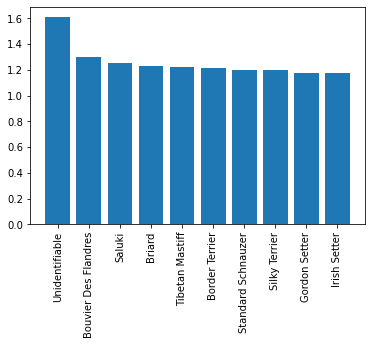

In [109]:
plt.bar(rating_breed.index, rating_breed.values);
plt.xticks(rotation=90);

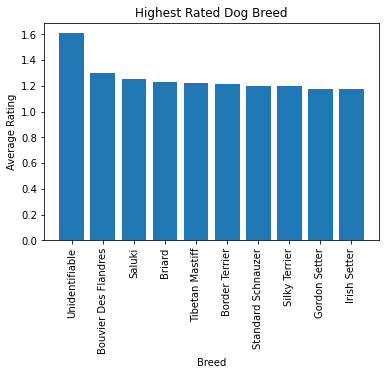

In [110]:
fig, ax = plt.subplots()
ax.bar(rating_breed.index, rating_breed.values);

plt.ylabel('Average Rating')
plt.xlabel('Breed')
plt.xticks(rotation=90);

ax.set_title('Highest Rated Dog Breed')
fig.savefig("highest rated breed.png")

### Most favored Tweets

In [111]:
fav_tweets = df_analyze.groupby(['tweet_id']).sum()['favorite_count'].sort_values(ascending = False).head(10)
fav_tweets

tweet_id
709852847387627521    149785
673662677122719744    128156
676440007570247681    115732
668286279830867968    112305
714258258790387713    110827
667174963120574464     95805
674318007229923329     85169
668955713004314625     83190
667902449697558528     76222
822610361945911296     76088
Name: favorite_count, dtype: int64

### Dog stage with the most retweets

In [112]:
dog_stage_retwt = df_analyze.groupby('dog_stage').sum()['retweet_count'].sort_values(ascending = False)
dog_stage_retwt

dog_stage
pupper            602196.0
doggo             130797.0
puppo              25408.0
doggo, pupper      23089.0
floofer            11577.0
doggo, floofer      1511.0
doggo, puppo         262.0
Name: retweet_count, dtype: float64

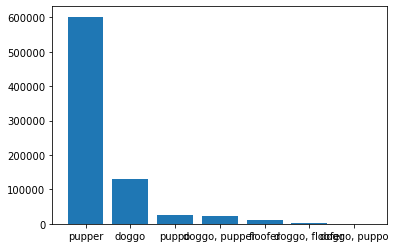

In [113]:
plt.bar(dog_stage_retwt.index, dog_stage_retwt.values);

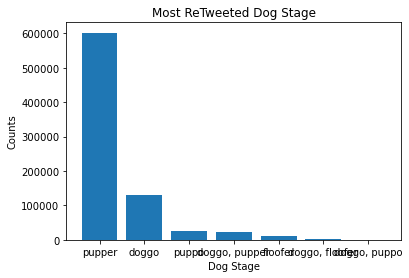

In [114]:
fig, ax = plt.subplots()
ax.bar(dog_stage_retwt.index, dog_stage_retwt.values);

plt.ylabel('Counts')
plt.xlabel('Dog Stage')
ax.set_title('Most ReTweeted Dog Stage')
fig.savefig("Stages bar.png")

### Top 5 Dog Names

In [115]:
top_5_names=df_analyze['name'].value_counts()[:5]
top_5_names

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Name: name, dtype: int64

Text(0, 0.5, 'Counts')

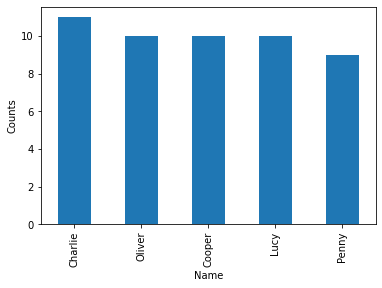

In [116]:
df_analyze['name'].value_counts()[:5].plot(kind="bar")
plt.xlabel('Name')
plt.ylabel('Counts')

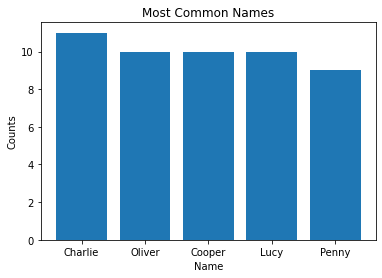

In [117]:
fig, ax = plt.subplots()
ax.bar(top_5_names.index, top_5_names.values);

plt.ylabel('Counts')
plt.xlabel('Name')
ax.set_title('Most Common Names')
fig.savefig("names bar.png")


### What does the rating distribution look like?

In [118]:
rating.describe()

count    1994.000000
mean        1.164875
std         4.064302
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
dtype: float64

In [119]:
rating.sort_values().tail(20)

786       1.400000
206       1.400000
95        1.400000
634       1.400000
165       1.400000
362       1.400000
324       1.400000
64        1.400000
49        1.400000
571       1.400000
153       1.400000
113       1.400000
333       1.400000
36        1.400000
399       1.400000
549       1.400000
162       1.400000
385       3.428571
1718     42.000000
726     177.600000
dtype: float64

In [120]:
# remove rating greater than 1.4
rating_without_outliers = rating.sort_values()[0:-3]

In [121]:
rating_without_outliers.sort_values().tail(20)

681     1.4
253     1.4
332     1.4
549     1.4
9       1.4
131     1.4
256     1.4
119     1.4
21      1.4
297     1.4
147     1.4
313     1.4
318     1.4
455     1.4
278     1.4
275     1.4
1280    1.4
146     1.4
100     1.4
162     1.4
dtype: float64

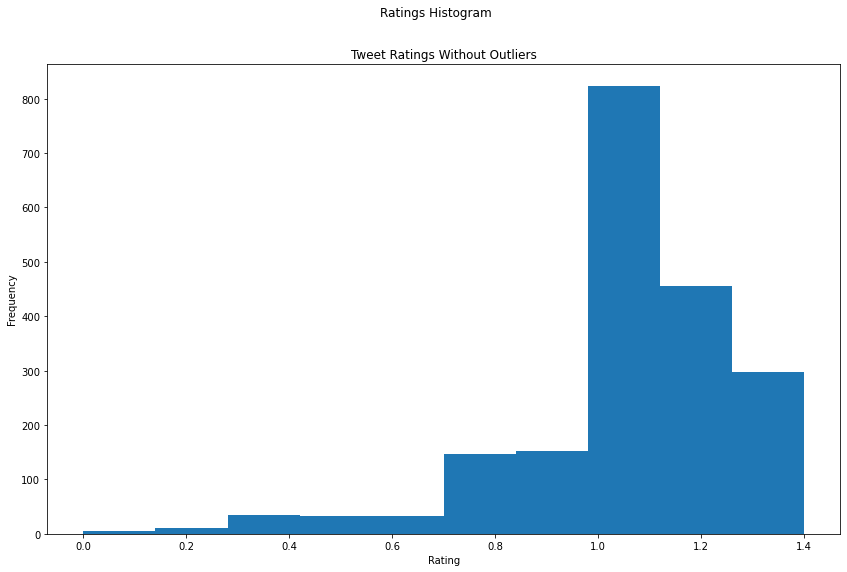

In [122]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Ratings Histogram')
ax.set_title('Tweet Ratings Without Outliers')
fig.tight_layout(pad=2.0)

plt.ylabel('Frequency')
plt.xlabel('Rating')
ax.hist(rating_without_outliers);
fig.savefig("ratings histogram.png")

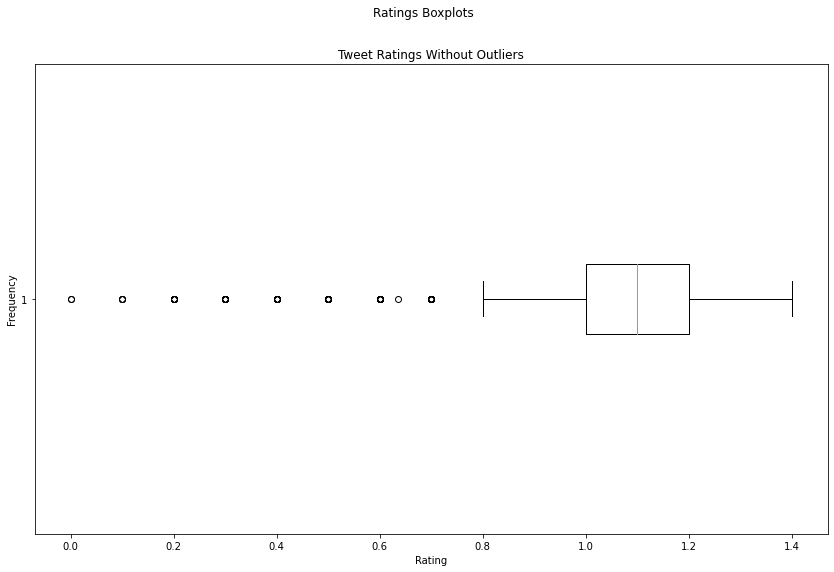

In [123]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Ratings Boxplots')
ax.set_title('Tweet Ratings Without Outliers')
fig.tight_layout(pad=2.0)

plt.ylabel('Frequency')
plt.xlabel('Rating')


ax.boxplot(rating_without_outliers, vert=False);
fig.savefig("ratings boxplot.png")